### DISCLAIMER

Most of the code has been aquired through the following to sources:
1. https://www.tensorflow.org/datasets/keras_example
2. https://www.tensorflow.org/tutorials/images/cnn

With the help of the above two sources the neural netowrks below were created. 

## Importing required libraries

In [53]:
# UNCOMMENT THE LINE BELOW TO INSTALL LIBRARIES
# !pip install tensorflow tensorflow-datasets matplotlib

In [54]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Preparing the data

### Loading the MINST dataset

In [55]:
# Loading in the dataset using tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],  # Splits the dataset up into a train part and test part
    shuffle_files=True,       # Shuffles files so that model doesn't learn unintended patterns
    as_supervised=True,
    with_info=True,
)

### Normalising images

In [56]:
# Normalises the pixels of an image, so that it can be used for training
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

### Preparing the training dataset

In [57]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)  # Normalises image
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)            # Shuffles data
ds_train = ds_train.cache()                                                  # Saves normalisation of image/dataset so that it doesn't have to be normalised again
ds_train = ds_train.batch(50)                                                # Trains with x amount of samples immediately each time instead of e.g. 1
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)                               # Prepare next dataset as current one is being used

### Preparing the testing dataset

In [58]:
# Same explanation as for training the model
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Networks

### Fully Connected Neural Network (1 hidden layer)

In [59]:
# Defining model
model_FCNN_1 = tf.keras.models.Sequential([         # Define model type; sequential goes through all layers one after another
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # First layer
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer; .Dense forces it to be fully connected
    tf.keras.layers.Dense(10)                       # Final output layer; "10" because we have 10 types of images (numbers 0 - 9).
])

# Compiling the model
model_FCNN_1.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                             # Algorithm to update model's weights during training; backpropagation!!
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function; evaluate model's prediction
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Training the model
model_FCNN_1.fit(
    ds_train,                 # Uses dataset to train model
    epochs=6,                 # Amount of times a dataset is trained on
    validation_data=ds_test,  # Tests the trained model; will influence each new epoch
)

Epoch 1/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4861 - sparse_categorical_accuracy: 0.8635 - val_loss: 0.1595 - val_sparse_categorical_accuracy: 0.9530
Epoch 2/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 0.1486 - sparse_categorical_accuracy: 0.9565 - val_loss: 0.1129 - val_sparse_categorical_accuracy: 0.9665
Epoch 3/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.1002 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.0919 - val_sparse_categorical_accuracy: 0.9725
Epoch 4/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 0.0733 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0807 - val_sparse_categorical_accuracy: 0.9753
Epoch 5/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.0557 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0762 - val_sparse_categorical_accuracy: 0.9763
Epoch 6/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 0.0434 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0750 - val_sparse_categorical_accur

### Fully Connected Neural Network (3 hidden layers)

In [60]:
# Defining model
model_FCNN_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(128, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(128, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(10)
])

# Compiling the model
model_FCNN_2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                             # Algorithm to update model's weights during training; backpropagation!!
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function; evaluate model's prediction
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Training the model
model_FCNN_2.fit(
    ds_train,                 # Uses dataset to train model
    epochs=6,                 # Amount of times a dataset is trained on
    validation_data=ds_test,  # Tests the trained model; will influence each new epoch
)

Epoch 1/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4527 - sparse_categorical_accuracy: 0.8661 - val_loss: 0.1094 - val_sparse_categorical_accuracy: 0.9663
Epoch 2/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1127 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0961 - val_sparse_categorical_accuracy: 0.9700
Epoch 3/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0765 - sparse_categorical_accuracy: 0.9763 - val_loss: 0.0869 - val_sparse_categorical_accuracy: 0.9743
Epoch 4/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0553 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0797 - val_sparse_categorical_accuracy: 0.9778
Epoch 5/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.1019 - val_sparse_categorical_accuracy: 0.9722
Epoch 6/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.978

### Convolutional Neural Network

In [61]:
# Conv2D(32 is a single layer with 32 filters; these filters go over a (3, 3) part of the image and create feature maps
# MaxPooling2D reduces size of the information the feature maps gathered, while keeping all the relevant information
model_CNN = models.Sequential()
model_CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(layers.Flatten())                      # Transforms 2D feature map into 1D
model_CNN.add(layers.Dense(128, activation='relu'))  # Connect "neurons" from convolutional layers to dense layer to perform classification
model_CNN.add(layers.Dense(10))                      # Output layer

# Compiling the model
model_CNN.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                             # Algorithm to update model's weights during training; backpropagation!!
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function; evaluate model's prediction
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Training the model
model_CNN.fit(
    ds_train,                 # Uses dataset to train model
    epochs=6,                 # Amount of times a dataset is trained on
    validation_data=ds_test,  # Tests the trained model; will influence each new epoch
)

Epoch 1/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3614 - sparse_categorical_accuracy: 0.8908 - val_loss: 0.0414 - val_sparse_categorical_accuracy: 0.9854
Epoch 2/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0501 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0331 - val_sparse_categorical_accuracy: 0.9897
Epoch 3/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.0298 - val_sparse_categorical_accuracy: 0.9895
Epoch 4/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0235 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.0363 - val_sparse_categorical_accuracy: 0.9896
Epoch 5/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0212 - sparse_categorical_accuracy: 0.9932 - val_loss: 0.0325 - val_sparse_categorical_accuracy: 0.9903
Epoch 6/6
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.0292 - val_sparse_categorical_accuracy: 0.991

### Testing the networks

In [62]:
# Call each network, and store results in variables
test_loss_FCCN_1, test_accuracy_FCNN_1 = model_FCNN_1.evaluate(ds_test)
test_loss_FCCN_2, test_accuracy_FCNN_2 = model_FCNN_2.evaluate(ds_test)
test_loss_CNN, test_accuracy_CNN = model_CNN.evaluate(ds_test)

# Prints results of testing per network
print(f"{'FCNN_1\'s accuracy:':<20}{test_accuracy_FCNN_1:.4f}")
print(f"{'FCNN_2\'s accuracy:':<20}{test_accuracy_FCNN_2:.4f}")
print(f"{'CNN\'s accuracy:':<20}{test_accuracy_CNN:.4f}\n")

print(f"{'FCNN_1\'s loss:':<16}{test_loss_FCCN_1:.4f}")
print(f"{'FCNN_2\'s loss:':<16}{test_loss_FCCN_2:.4f}")
print(f"{'CNN\'s loss:':<16}{test_loss_CNN:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0736 - sparse_categorical_accuracy: 0.9756
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9782
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - sparse_categorical_accuracy: 0.9910
FCNN_1's accuracy:  0.9767
FCNN_2's accuracy:  0.9785
CNN's accuracy:     0.9919

FCNN_1's loss:  0.0750
FCNN_2's loss:  0.0810
CNN's loss:     0.0292


### Accuracy and loss plots

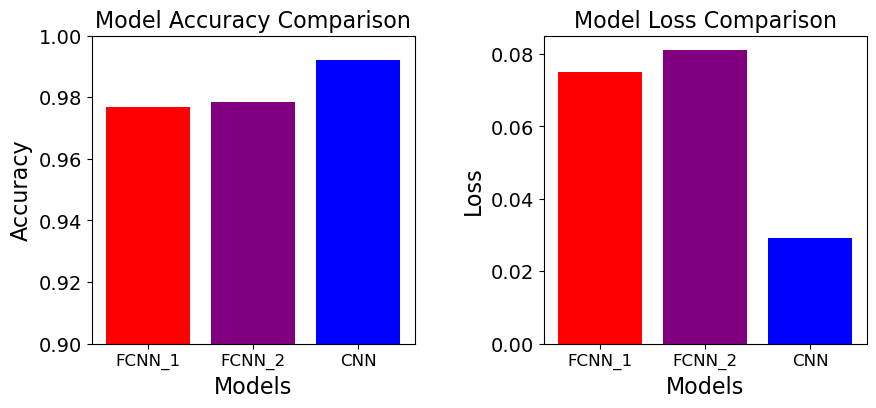

In [63]:
models = ["FCNN_1", "FCNN_2", "CNN"]

# Create subplots to nicely show plots next to each other
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, gridspec_kw={'wspace': 0.4})

# Accuracy Plot
accuracy = [test_accuracy_FCNN_1, test_accuracy_FCNN_2, test_accuracy_CNN]
axes[0].bar(models, accuracy, color=["red", "purple", "blue"])
axes[0].set_xlabel("Models", fontsize=16)
axes[0].set_ylabel("Accuracy", fontsize=16) 
axes[0].set_title("Model Accuracy Comparison", fontsize=16)
axes[0].set_ylim(0.90, 1)  # Zooms in on upper half of y-axis
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=14)

# Loss Plot
loss = [test_loss_FCCN_1, test_loss_FCCN_2, test_loss_CNN]
axes[1].bar(models, loss, color=["red", "purple", "blue"])
axes[1].set_xlabel("Models", fontsize=16)
axes[1].set_ylabel("Loss", fontsize=16)
axes[1].set_title("Model Loss Comparison", fontsize=16)
axes[1].tick_params(axis="x", labelsize=12)
axes[1].tick_params(axis="y", labelsize=14)

plt.show()

### Data analysis
In the plots above it is evident that the CNN performs the best based on the provided training and testing data. The main reason probably lies in the way Fully Connected Artifical Networks (FCNN's) and Convolutional Neural Networks (CNN's) process image data. 

For FCNN's, the pixel data is received and each seperate pixel is analysed. Then, based on common features and patterns, an attempt is made to indentify images. For CNN's this is different: CNN's process image data as 2D arrays (this is also visible in the code above; that's why e.g. .Flatten() had to be used). Seeing as CNN's take into account where each pixel belongs, instead of analysing each pixel seperately, it will most likely detect more accurate patterns, thereby increasing its accuracy in the testing epoches. This would also explain why its loss is lower compared to the other two; the CNN model is better able to generalise to new data. For the FCNN models, the accuracy is not that far behind the CNN's accuracy, but the loss of FCNN_1 and especially FCNN_2 is way higher than the one for CNN. A higher loss will indicate something like over- or underfitting. FCNN_2 has two more hidden layers compared to FCNN_1, thus meaning FCNN_2 has more parameters to work with, which does not seem to work for the provided data. 

Therefore, CNN is able to best generalise to new data, while FCNN_1 and FCNN_2 fail to do this.